In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hosp = pd.read_csv("../data/output/AverageReadmissionRatioByState.csv")
hosp.shape

(51, 2)

In [4]:
hosp.tail()

,State,Excess Readmission Ratio
46,VT,0.957130
47,WA,0.969821
48,WI,0.968758
49,WV,1.018036
50,WY,0.993947


In [5]:
esrd = pd.read_csv("../data/input/DialysisCareQualityData.csv")
esrd.shape

(6574, 59)

In [29]:
esrd2 = esrd[["StateCode", "SRR", "Region"]]
esrd2.head()

,StateCode,SRR,Region
0,AL,0.945240,South
1,AL,1.133493,South
2,AL,1.322441,South
3,AL,0.786654,South
4,AL,0.879016,South


In [31]:
esrd2["SRR"].describe()

count    6356.000000
mean        0.986971
std         0.288544
min         0.000000
25%         0.808467
50%         0.994469
75%         1.172126
max         2.295119
Name: SRR, dtype: float64

In [32]:
esrd3 = esrd2.dropna()
esrd3.shape

(6356, 3)

In [38]:
esrd4 = esrd3.groupby('StateCode').mean()
esrd4.head()

,SRR
StateCode,
AK,0.795926
AL,0.932061
AR,0.995192
AS,0.279417
AZ,0.932405


In [34]:
esrd4.shape

(56, 1)

In [46]:
df = pd.merge(hosp, esrd4, left_on='State', right_on='StateCode')
df.shape

(51, 3)

In [47]:
df.head()

,State,Excess Readmission Ratio,SRR
0,AK,0.956058,0.795926
1,AL,1.018150,0.932061
2,AR,1.023103,0.995192
3,AZ,0.983623,0.932405
4,CA,1.003880,0.967392


In [48]:
region = pd.read_csv("../data/input/Census-Bureau-Regions.csv")
region.drop(columns=["State"], inplace=True)
region.sample(5)

,State Code,Region,Division
42,TN,South,East South Central
31,NJ,Northeast,Middle Atlantic
14,IL,Midwest,East North Central
49,WV,South,South Atlantic
35,OH,Midwest,East North Central


In [49]:
df = pd.merge(df, region, left_on="State", right_on="State Code")
df.head(56)

,State,Excess Readmission Ratio,SRR,State Code,Region,Division
0,AK,0.956058,0.795926,AK,West,Pacific
1,AL,1.018150,0.932061,AL,South,East South Central
2,AR,1.023103,0.995192,AR,South,West South Central
3,AZ,0.983623,0.932405,AZ,West,Mountain
4,CA,1.003880,0.967392,CA,West,Pacific
5,CO,0.957346,0.841315,CO,West,Mountain
6,CT,1.005010,1.012869,CT,Northeast,New England
7,DC,1.030351,1.099348,DC,South,South Atlantic
8,DE,0.986648,0.949382,DE,South,South Atlantic
9,FL,1.027955,1.120314,FL,South,South Atlantic


In [64]:
df.to_csv("../data/output/HospitalsAndDialysisFacilitiesSRR.csv")

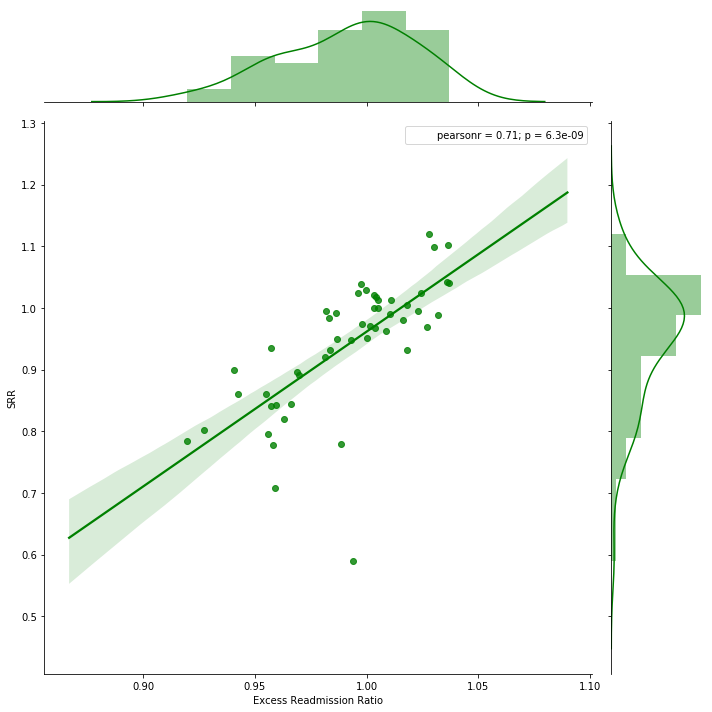

In [27]:
import scipy.stats as stats
j = sns.jointplot(x="Excess Readmission Ratio", y="SRR", data=df, size=10, color="g", kind="reg")
j.annotate(stats.pearsonr)

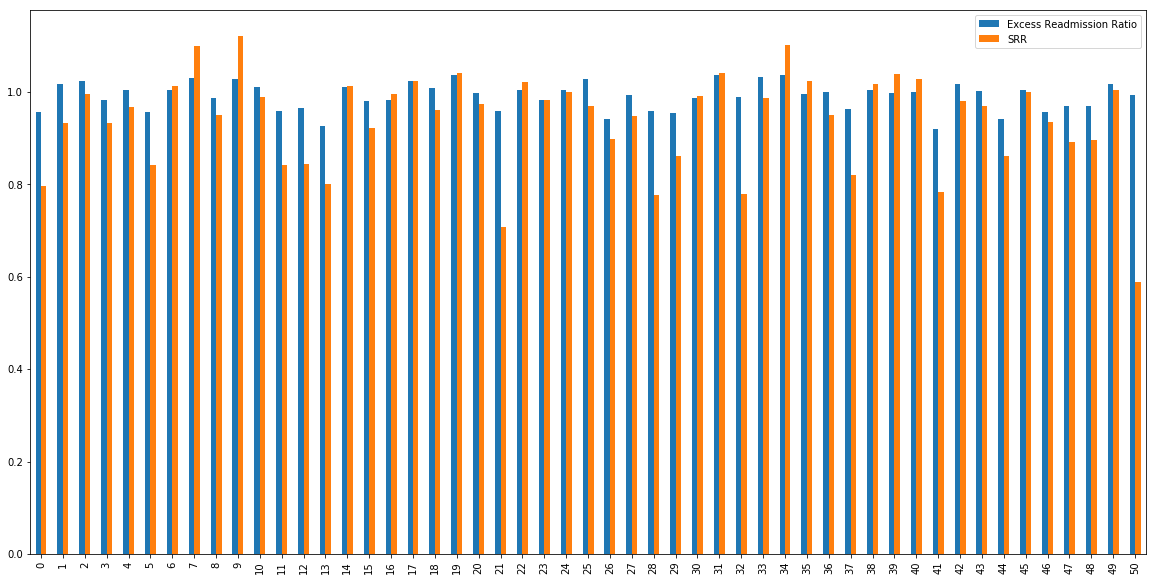

In [16]:
# Grouped bar chart
df.plot(kind="bar", figsize=(20,10))  

In [17]:
df.head()

,State,Excess Readmission Ratio,SRR
0,AK,0.956058,0.795926
1,AL,1.018150,0.932061
2,AR,1.023103,0.995192
3,AZ,0.983623,0.932405
4,CA,1.003880,0.967392


In [21]:
df["SRR"].mean()

0.9393735798753111

In [22]:
df.describe()

,Excess Readmission Ratio,SRR
count,51.000000,51.000000
mean,0.991212,0.939374
std,0.029532,0.104667
min,0.919639,0.589575
25%,0.967446,0.876168
50%,0.997538,0.969150
75%,1.010593,1.008740
max,1.037059,1.120314


AttributeError: 'FacetGrid' object has no attribute 'annotate'

<Figure size 1152x1152 with 0 Axes>

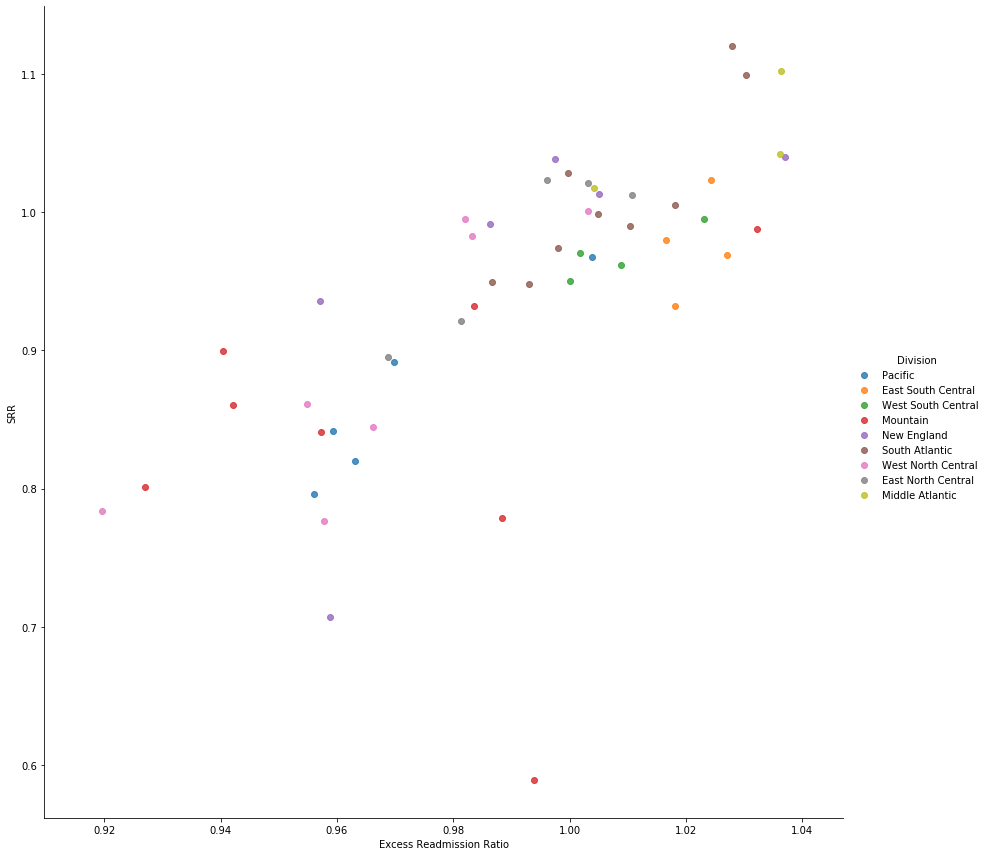

In [62]:
import scipy.stats as stats
plt.figure(figsize=(16, 16))
j = sns.lmplot(x="Excess Readmission Ratio", y="SRR",  fit_reg=False, data=df, hue="Division", height=12)
j.annotate(stats.pearsonr)
for line in range(0,df.shape[0]):
     j.text(df["Excess Readmission Ratio"][line], df["SRR"][line], df["State"][line], horizontalalignment='left', size='medium', color='black', weight='semibold')